In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
plt.style.use('ggplot')

# Make a fake binary classificaiton data set

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=1)

In [3]:
X.shape

(1000, 10)

In [4]:
np.unique(y)

array([0, 1])

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
X_ = np.arange(-10, 10)
y_ = sigmoid(X_)

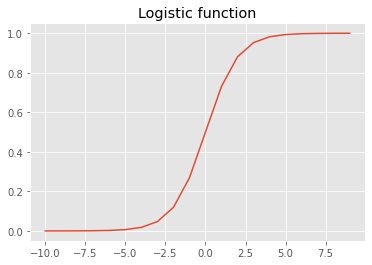

In [7]:
plt.plot(X_, y_)
plt.title('Logistic function')
plt.show()

# Implementation of Logistic Regression Model

In [8]:
class Logistic_Regression():
    def __init__(self):
        self
    def fit(self, X=None, y=None, W = None, lr = 0.1, n_iteration = 2000):
        self.W = np.random.randn(X.shape[1]+1)
        logit = np.dot(X, self.W[1:]) + self.W[0]
        y_hat = sigmoid(logit)
        cost = (-np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))) / X.shape[0] 
        for _ in range(n_iteration):
            dev_w = np.dot(X.T, (y_hat - y)) / X.shape[0]
            dev_b = (y_hat - y).sum() / X.shape[0] 
            self.W[0] -= lr * dev_b
            self.W[1:] -= lr * dev_w
            logit = np.dot(X, self.W[1:]) + self.W[0]
            y_hat = sigmoid(logit)
            cost = -np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat)) / X.shape[0] 
        print('Training Logistic Regression')
        
    def predict_prob(self, X_test = None):
        logit = np.dot(X_test, self.W[1:]) + self.W[0]
        pred_prob = sigmoid(logit)
        return np.array([1-pred_prob, pred_prob]).T
    
    def predict(self, X_test = None, threshold = 0.5):
        logit = np.dot(X_test, self.W[1:]) + self.W[0]
        pred = sigmoid(logit) >= threshold
        pred = pred.astype('int')
        return pred
        

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
LR = Logistic_Regression()
LR.fit(X_train, y_train)

Training Logistic Regression


In [11]:
y_pred = LR.predict(X_test)

In [12]:
print('Accuray of Logistic Regression Model is ', np.mean(y_pred == y_test))

Accuray of Logistic Regression Model is  0.864


In [13]:
y_prob = LR.predict_prob(X_test)

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
print('ROC_AUC of Logistic Regression Model is ', roc_auc_score(y_test, y_pred))

ROC_AUC of Logistic Regression Model is  0.8640708191673616


# Plot of ROC Curves and Area Under the Curve (AUC)

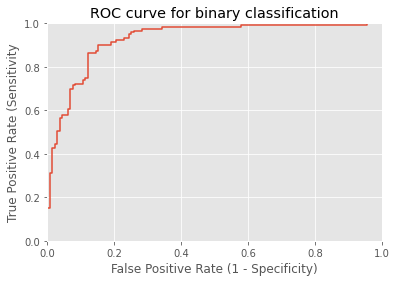

In [15]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for binary classification')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity')
plt.grid(True)